# Exercise 2


 this exercise we will ...

- 2.1: investigate the urn equation from the lecture in an experiment.
- 2.2: implement and apply the perceptron learning algorithm (PLA).
- 2.3: classify the iris species from last week using the perceptron learning algorithm. 
- 2.4: (optionally) investigate the perceptron learning algorithm using a synthetic dataset.

## 2.1 Multiple urns (Hoeffding inequality)

In the lecture you learned about the urn model. In particular, the difference between one and several urns was discussed and what effect this has on the Hoeffding inequality. In this exercise, you will investigate the difference between one and several urns in a numerical experiment.

**Experiment**

Consider 1000 coins. Let the coins be fair (i.e. not jagged). Each of these coins is tossed $N=10$ times and it is noted whether heads or tails fell. In addition, **for each of the coins** $i$ ($i\in\{1, \ldots, 1000\}$) the fraction $\nu_i$ is determined with which heads fell in the 10 tosses.

Now consider 3 of these 1000 coins as follows:

1. consider only the first coin ($i=1$). The fraction is called $\nu_1$.
2. you consider a randomly selected coin among the 1000 coins. The fraction is called $\nu_r$ (*r* for *r*random).
3. you consider exactly the coin $m$ for which $\nu$ is minimal, i.e. $m=\underset{i\in\{1,\ldots, 1000\}}{\operatorname{arg\,min}}(\nu_i)$. The fraction is $\nu_m$ (*m* for minimum).

Edit the followingn subtasks:

(1) What is the probability $\mu$ of the coins for heads? Specify $\mu$.




In [1]:
# 0.5


(2) Now implement the 10 random tosses for the 1000 coins. To do this, create a variable `coins` that contains the result of the 10 tosses (rows) for the 1000 coins (columns) in a matrix (numpy array). If heads was thrown, the matrix contains a $1$ at the corresponding position. If tails was tossed, it contains a $0$ in the corresponding position.

- Tip: Use the [randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) function of Numpy with the *size* parameter to generate all coin tosses in one command. Check that your array `coins` actually only contains zeros and ones. 




In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

final_tail = []
np.random.seed(123)
coins = np.random.randint(0,2,(10,1000)) 
print(coins)
print(coins.shape)
print(np.size(final_tail))

[[0 1 0 ... 1 0 1]
 [0 1 1 ... 0 0 0]
 [1 1 1 ... 1 0 1]
 ...
 [0 0 0 ... 1 0 0]
 [1 1 1 ... 0 0 1]
 [0 1 0 ... 0 1 1]]
(10, 1000)
0


(3) Now write a function that uses the command from the previous subtask to generate 10 tosses for 1000 coins and also determines $\nu_1$, $\nu_r$ and $\nu_m$ and returns them as values. Please note that $r$ and $m$ are **not** passed to this new function, but that $r$ and $m$ must be determined within the function.

Tips:

- To select a randome coin, [randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) is helpful.

- To select the coin $m$ with the smallest fraction $\nu_m$, [argmin](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) is helpful.



In [4]:
# For each column in the matrix, calculate the proportion of times the "heads" face appears:
# Calculate the proportion of "heads" faces (Vi)

heads_ratio = np.sum(coins == 0, axis=0) / 10
print(heads_ratio.shape)

(1000,)


In [5]:
#𝜈1 Take the "heads" ratio of the first coin:
nu_1 = heads_ratio[0]
print(nu_1)


0.5


In [7]:
#vr Pick a random coin:
random_index = np.random.randint(0, 1000)
nu_r = heads_ratio[random_index]
print(nu_r)


0.1


In [8]:
# Vm Find the lowest rate
nu_m = np.min(heads_ratio)
print(nu_m)

0.1


(4) Use the function from subtask (3) to repeat the experiment one hundred thousand times. Create a separate numpy array for each of $\nu_1$, $\nu_r$ and $\nu_m$, which holds the 100,000 values.

In [13]:
num_experiments = 100000
num_tosses = 10

# Coin tossing simulation
np.random.seed(123)  # For reproducibility
coins = np.random.randint(0, 2, (num_experiments, num_tosses))  # 0 = Heads, 1 = Tails
heads_ratio = np.sum(coins == 0, axis=1) / num_tosses  # Heads proportion for each experiment

# Arrays for ν₁, νᵣ, νₘ
nu_1 = heads_ratio[0]  # Proportion for the first coin
# Randomly pick an experiment and calculate its proportion (νᵣ)
random_index = np.random.randint(0, num_experiments)
nu_r = heads_ratio[random_index]  # Proportions for random coins
nu_m = np.min(heads_ratio)  # Minimum proportion
print(nu_1)
print(nu_r)
print(nu_m)

0.7
0.5
0.0


(5) Visualize the distribution of $\nu_1$ in a histogram. Also create corresponding visualizations for $\nu_r$ and $\nu_m$.

Tip:

- Use the [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) function from Seaborn to easily generate histograms.


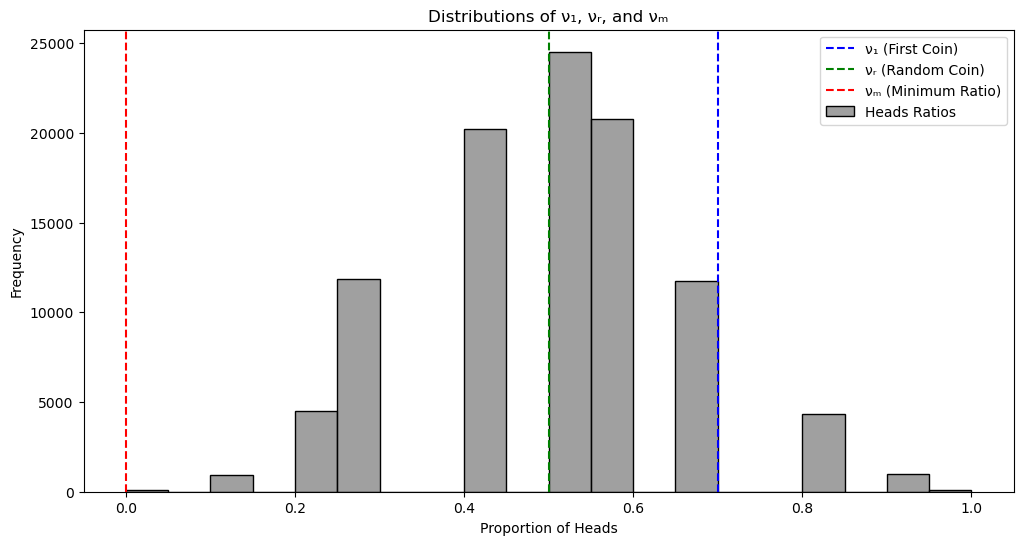

In [14]:
# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(heads_ratio, kde=False, bins=20, color='gray', label="Heads Ratios")
plt.axvline(nu_1, color='blue', linestyle='--', label="ν₁ (First Coin)")
plt.axvline(nu_r, color='green', linestyle='--', label="νᵣ (Random Coin)")
plt.axvline(nu_m, color='red', linestyle='--', label="νₘ (Minimum Ratio)")

plt.legend()
plt.title("Distributions of ν₁, νᵣ, and νₘ")
plt.xlabel("Proportion of Heads")
plt.ylabel("Frequency")
plt.show()


(6) Consider the visualization from step (5): Which coin behaves differently from the other two coins? Name this coin.

(7) Use the values from subtask (4) and estimate the following probability:  

$$\mathbb{P}[|\nu - \mu|>\epsilon]$$

as a function of $\epsilon$ for the first coin ($\nu_1$), as well as for the randome coin ($\nu_r$) and the coin $\nu_m$. Visualize the estimated probabilities for different values of $\epsilon$ between $0$ and $0.8$.

Tip:

- The following function could help you to vary $\epsilon$: [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html).

Also draw the Hoeffding barrier from the lecture in your diagram,

$$2\cdot\exp^{-2\epsilon^2N}$$

($N=10$).




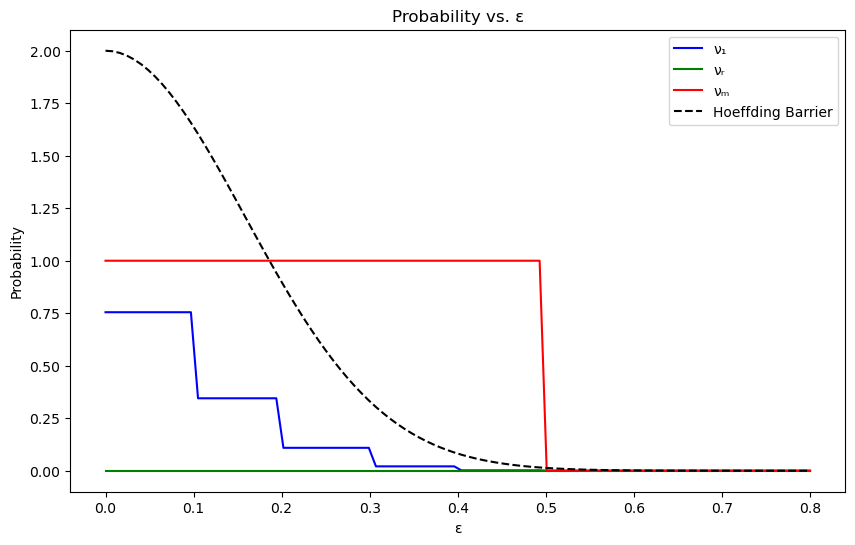

In [15]:
epsilon_values = np.linspace(0, 0.8, 100)  # Range of ε
mu = 0.5
N = num_tosses
hoeffding_barrier = 2 * np.exp(-2 * epsilon_values**2 * N)

# Calculate probabilities for ν₁, νᵣ, and νₘ
prob_nu_1 = [np.mean(np.abs(heads_ratio - mu) > eps) for eps in epsilon_values]
prob_nu_r = [np.mean(np.abs(nu_r - mu) > eps) for eps in epsilon_values]
prob_nu_m = [np.mean(np.abs(nu_m - mu) > eps) for eps in epsilon_values]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, prob_nu_1, label="ν₁", color="blue")
plt.plot(epsilon_values, prob_nu_r, label="νᵣ", color="green")
plt.plot(epsilon_values, prob_nu_m, label="νₘ", color="red")
plt.plot(epsilon_values, hoeffding_barrier, label="Hoeffding Barrier", color="black", linestyle="--")
plt.title("Probability vs. ε")
plt.xlabel("ε")
plt.ylabel("Probability")
plt.legend()
plt.show()


(8) Which coins obey the Hoeffding barrier? Which ones do not? Explain why which coin does not obey the Hoeffding barrier! Where exactly (conceptually) does a coin violate the requirements of the Hoeffding inequality?

(9) Make a reference to the multiple urn problem from the lecture.

## 2.2. Perceptron-Lern-Algorithm (PLA)

 The perceptron can be interpreted as a very simple neuron and is the starting point of the connectionists, the school of thought in machine learning that deals with neural networks. In this exercise, you will implement the perceptron and the perceptron learning algorithm (PLA), which can be used to train a perceptron on data for classification problems.

PLA is quite easy to implement and allows you to gain your first experience with supervised machine learning without hiding the complexity of learning algorithms in libraries from you.  

* If you wish, you can download the PDF of the lecture in ILIAS and briefly look up the slides that deal with the perceptron.

We proceed in two steps:

1. we implement the perceptron as a function.
2. we implement the perceptron learning algorithm (PLA).




### 2.2.1 Perceptron
The perceptron $h(\mathbf{x})$ is defined as follows:

$$h(\mathbf{x}) = \text{sign}(\mathbf{w}^T\mathbf{x})$$

with weights $w_i$ and with the sign function $\text{sign}(s)$, which outputs the sign (+1 or -1) of its argument. We will consider the perceptron in two dimensions ($d=2$). I have noted the vectors $\mathbf{w}$ and $\mathbf{x}$ again for this case:

$$\mathbf{w}\in\{(w_0, w_1, w_2)^T | w_0 \in\mathbb{R}, w_1 \in\mathbb{R}, w_2 \in\mathbb{R} \}$$

and

$$\mathbf{x}\in\{(x_0, x_1, x_2)^T | x_0 = 1, x_1 \in\mathbb{R}, x_2 \in\mathbb{R} \}$$

where $w_0$ plays the role of the threshold value $b$. We learned about the perceptron in the context of the loan granting problem, where $\mathbf{x}$ are the features (characteristics) of the bank customer, $w_i$ are the weights of these characteristics and $h(\mathbf{x})$ is the final decision on granting the loan. The task of PLA will be to change (or “learn”) the weights $w_i$ and the threshold $b$ so that the decisions ($h(\mathbf{x})$) about the loan match those made by the bank employees (to stay in the “lending” sample). Of course, we will not make credit decisions, but apply the perceptron to the Iris dataset to distinguish between two types of irises using the measured iris features $\mathbf{x}$. This is a classification problem and belongs to the field of *supervised learning*.




**Your Tasks:**

(1) Implementieren Sie das Perceptron als function mit dem Namen `h`, die einen Featurevektor $x$ und einen Gewichtsvektor $w$ entgegennimmt und $h(\mathbf{x})$ zurückgibt. Nutzen Sie die numpy functionen `dot` ([Dokumentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)) und `sign` ([Dokumentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sign.html)).

bevor [0. 0. 0.]
w after [0.         2.47383361 2.18403181]


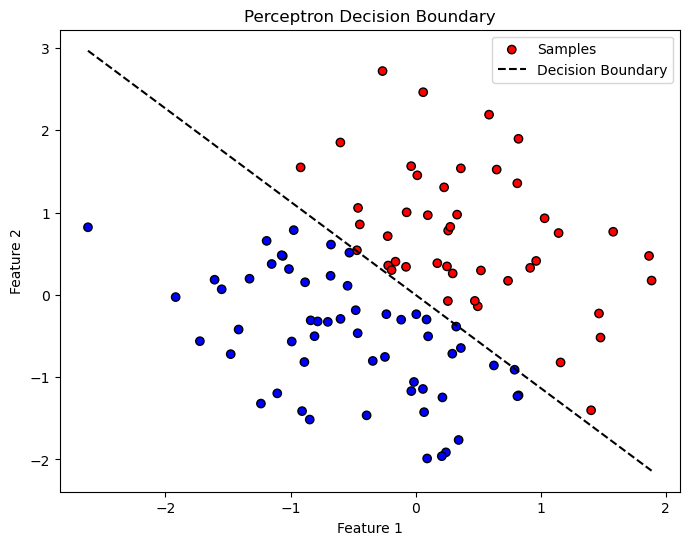

In [21]:
import numpy as np

# Generate synthetic data for demonstration
np.random.seed(42)
num_samples = 100
X = np.random.randn(num_samples, 2)  # Two features
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)  # Linearly separable labels

# Add bias term (x_0 = 1)
X = np.c_[np.ones(num_samples), X]
# Perceptron Learning Algorithm
def perceptron(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])  # Initialize weights
    print('bevor', w)
    for _ in range(max_iter):
        errors = 0
        for i in range(len(y)):
            if np.sign(np.dot(w, X[i])) != y[i]:
                w += y[i] * X[i]  # Update rule
                errors += 1
        if errors == 0:  # Stop if all points are classified correctly
            break
    print('w after', w)
    return w

# Train the perceptron
weights = perceptron(X, y)

# Decision boundary visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr', edgecolors='k', label='Samples')
x_boundary = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
y_boundary = -(weights[0] + weights[1] * x_boundary) / weights[2]
plt.plot(x_boundary, y_boundary, 'k--', label='Decision Boundary')
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Perceptron Decision Boundary")
plt.show()

### 2.2.2 PLA Algorithm

**Before you continue,** here is a note: If you accidentally build an infinite loop and/or your algorithm does not terminate, closing the browser window will not stop the calculation process (the kernel). It will continue to run on the server. Instead, in this case you should stop the kernel of this *Jupyter notebook* through the menu `Kernel -> Interrupt` or through the keyboard with: `ESC` (switch to command mode) and then press the `i` key twice. If you are interested in more information about *Jupyter Notebook*, please have a look at the tutorial of Exercise 0.4. 
* Do not forget to save your *Jupyter Notebook* from time to time (with the key combination `Ctrl` + `s`).

First read through the algorithm.

#### The PLA Algorithm

* **Data:** $(\mathbf{x_i}, y_i)$ with $i=1,\ldots,N$. 

Let $t=0,1,2,\ldots$ be the current iteration step and let $\mathbf{w}^{(t)}$ be the vector $\mathbf{w}$ for iteration step $t$. Set $t=0$ and $\mathbf{w}^{(0)}=\mathbf{0}$.

1. use the perceptron with $\mathbf{w}^{(t)}$ and classify all data $\mathbf{x_i}, i=1,\ldots,N$. The labels predicted by the perceptron are called $y_{i,\text{pred}}$.
2. select any pair $(\mathbf{x}_j, y_j)$ that has been misclassified (i.e. $y_{j,\text{pred}} \neq y_j$) and call it $(\mathbf{x}^{(t)}, y^{(t)})$. If there is no such pair, terminate.
3. update the weight $\mathbf{w}$ with followingr rule: $$\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)}+y^{(t)}\mathbf{x}^{(t)}$$
4. increase $t$ by the value $1$ and return to step 1.c
*** Translated with www.DeepL.com/Translator (free version) ***



**Your Tasks**

(1) Read through the algorithm. In which case does the algorithm terminate? *In which case does the algorithm not terminate? So what assumption do you have to make for the algorithm to terminate?

* If you get stuck here, read the following note that I have provided for you [ROT13-coded](https://rot13.de): Qvr Naanuzr vfg, qnff qvr Qngra yvarne frcnevreone fvaq, q.u. jve xöaara qvr Qngra zvguvysr rvare Trenqra (q=2) bqre Ulcrerorar (q>2) va vuer Xynffra nhsgrvyra.




(2) In the followingn code cell you will find a synthetic data set on which we want to train a perceptron using PLA. Execute the code below and look at the resulting image. The functions in the “Helper Functions” area are no longer relevant for you. They are only used to generate the data set.

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

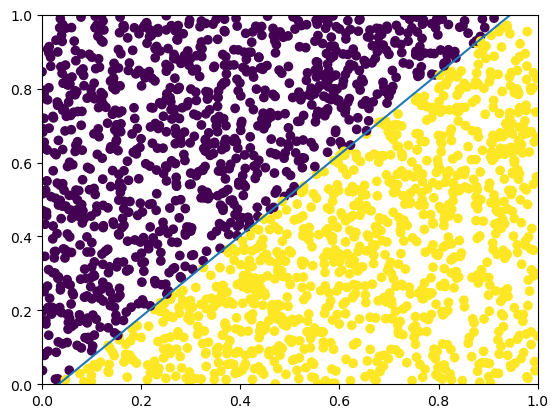

In [22]:
import numpy as np
from matplotlib import pyplot as plt
# For an explanation of the next line, 
# see https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html
%matplotlib inline 

# --------- START - Helper functions that you don't need to care about ---------

def generate_points(N):
    return np.random.rand(N, 2)


def generate_decision_line():
    g = generate_points(2)
    m = (g[1, 1] - g[1, 0]) / (g[0, 1] - g[0, 0])
    b = g[1, 0] - m * g[0, 0]

    def getY(x):
        return m * x + b

    func = getY
    return func


# This function creates an "unknown" target function f.
# f is then used to create labels y for points X.
# X is a matrix containing N rows (the data points) of
# with 2 dimensions (columns) each.
def getClassedPoints(N):
    np.random.seed(5)
    f = generate_decision_line()  # target function
    X = generate_points(N)  # data set
    y = np.array([1 if f(X[i, 0]) > X[i, 1] else -1
                  for i in range(X.shape[0])])  # labels
    return X, y, f


# --------- END -  Helper functions that you don't need to care about  ---------

# Obtain points X, labels y, and target function f.
# Note that in real world problems, we do not know f.
X, y, f = getClassedPoints(2000)

# Visualize data
plt.scatter(X[:, 0], X[:, 1], c=y)  # plots the data points
plt.plot(np.array([0, 1]), f(np.array([0, 1])))  # plots the target function
plt.axis((0, 1, 0, 1))  # ensures that we see the relevant part of the feature space

## 2.3 Classification of the iris data


You already got to know the Iris dataset in the previous Exercise 1.2 and gained some initial insights. As a quick reminder, I have plotted feature pairs for you below. Next to it, you will find examples of the three iris species that you can investigate in the post-following photo:

![Irises](https://data.bialonski.de/ml/schwertlilien.png)

* Simply execute the following code cell.

Anzahl unterschiedlicher Featurepaare: 6.0


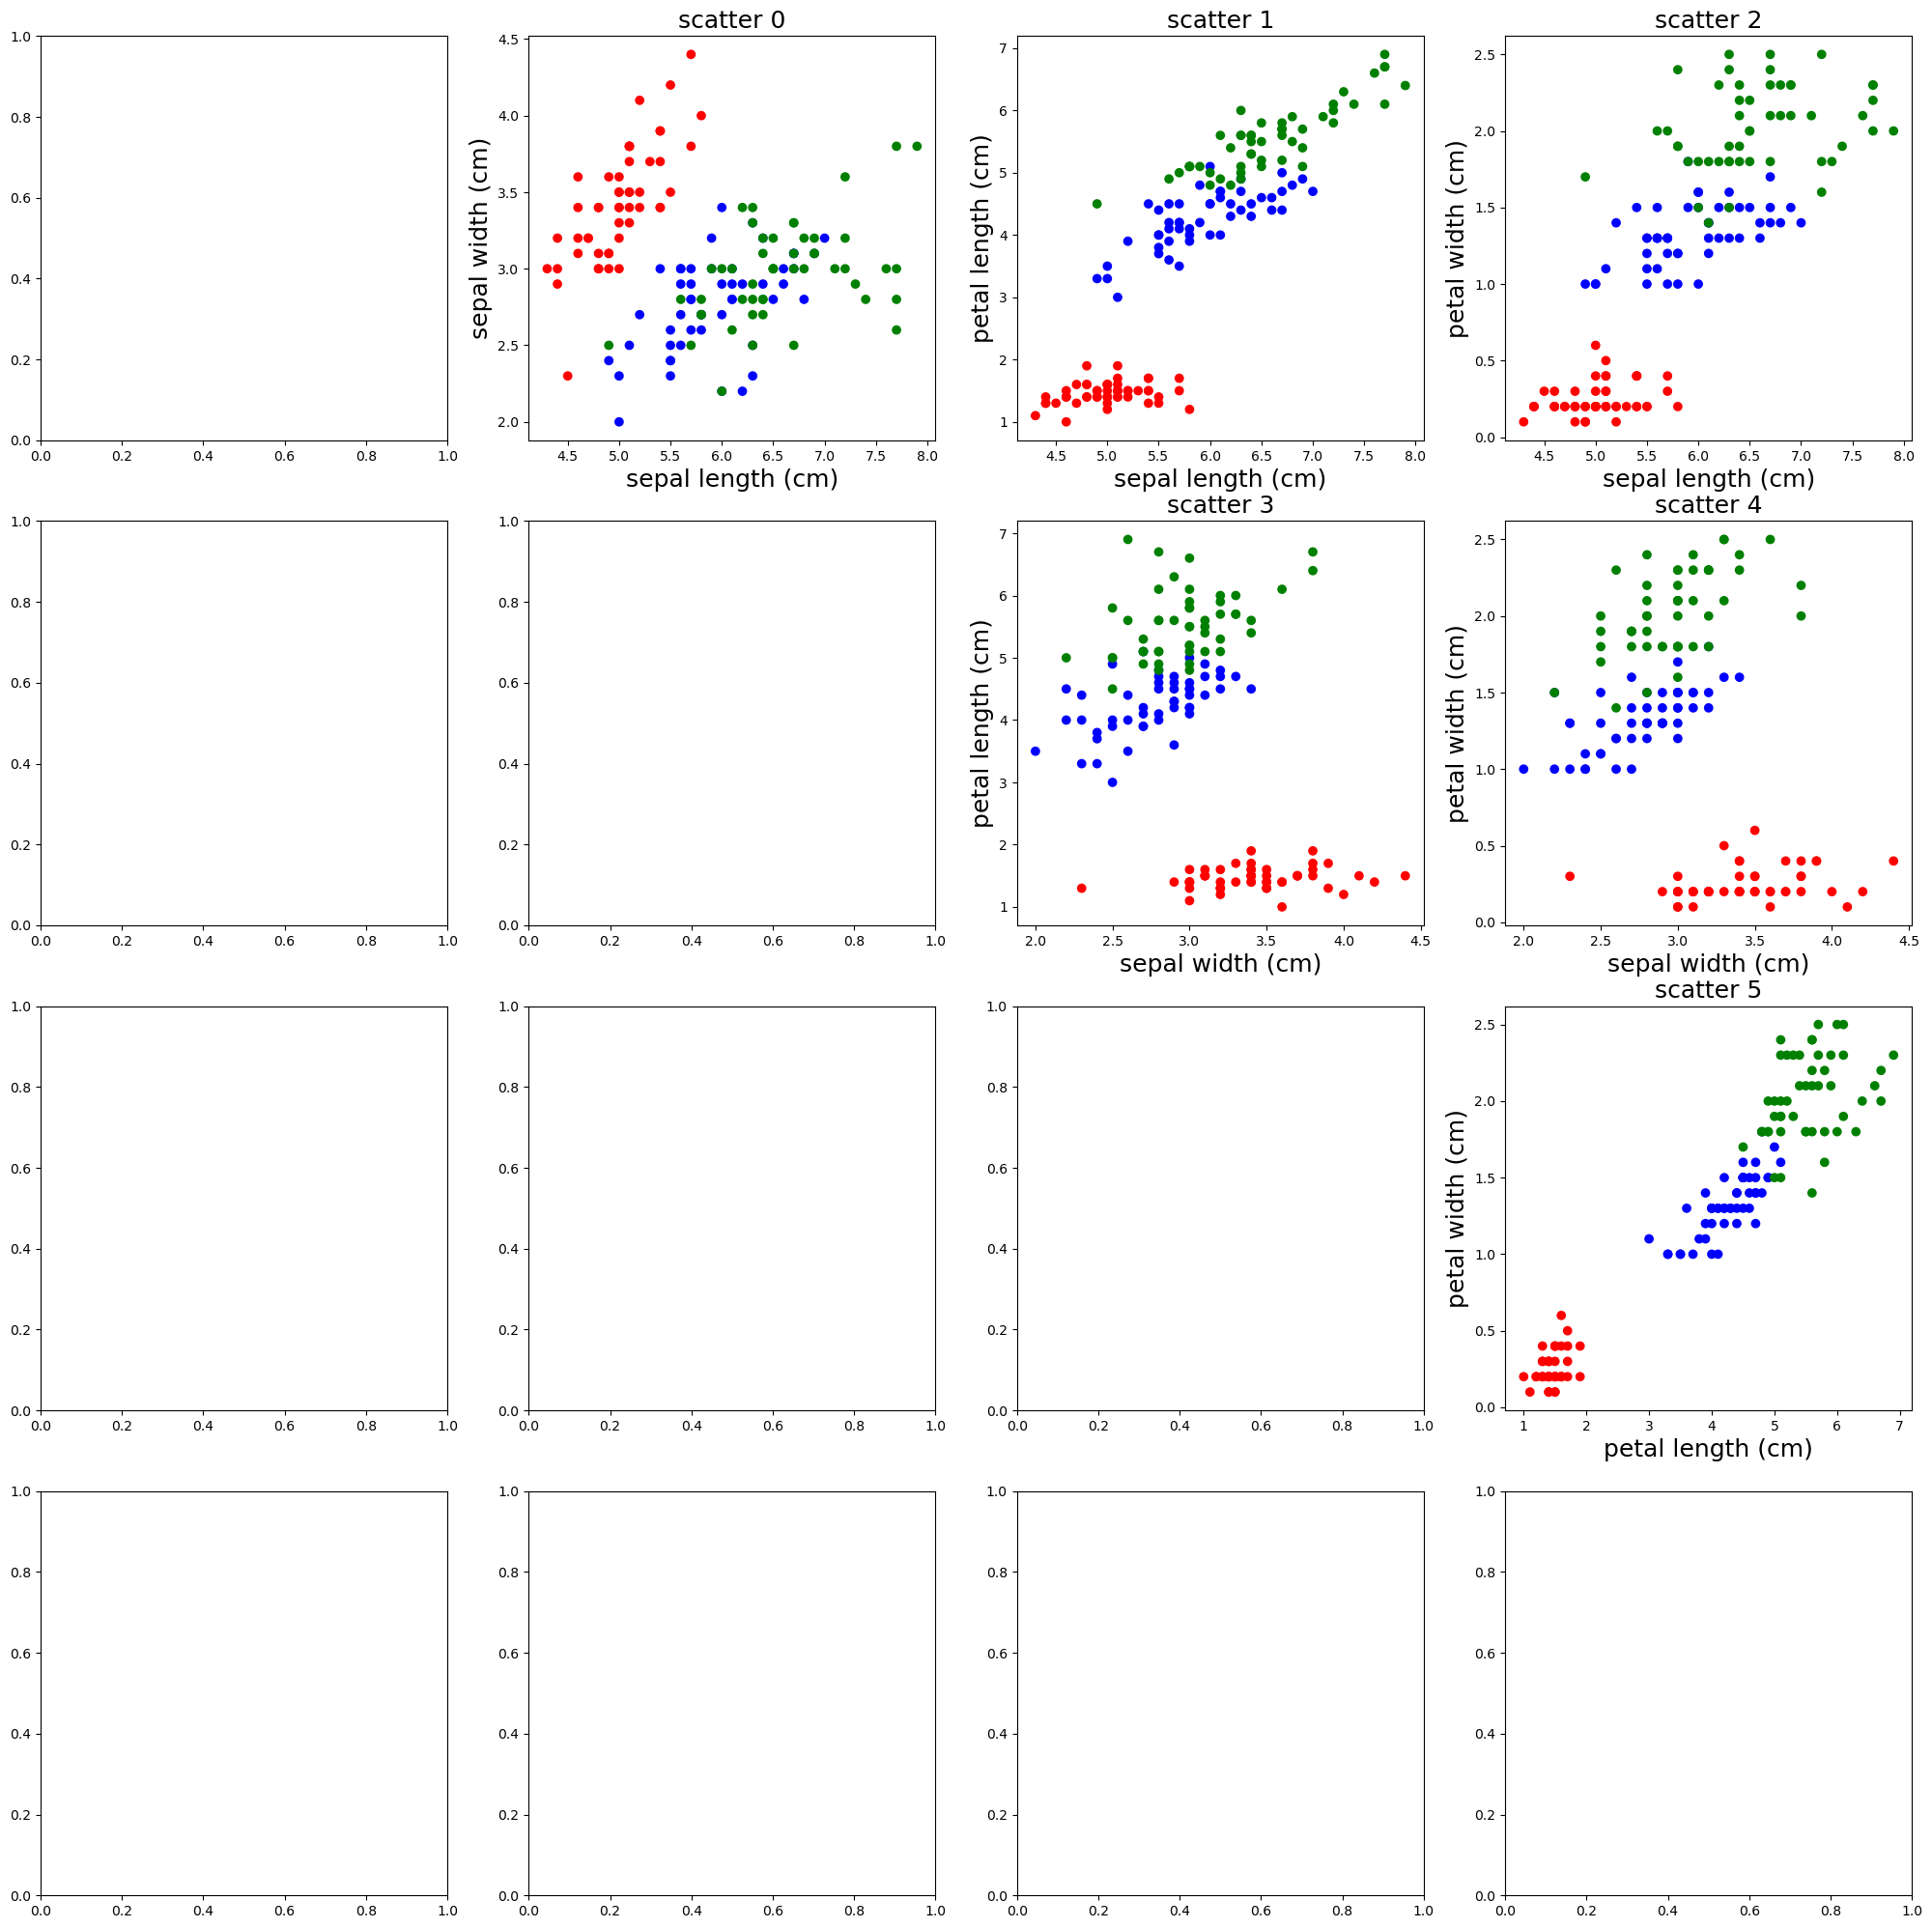

['red: setosa', 'blue: versicolor', 'green: virginica']


In [23]:
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

# import IRIS dataset
from sklearn.datasets import load_iris
data = load_iris()

feature_count = len(data['feature_names'])
print('Anzahl unterschiedlicher Featurepaare:', (feature_count**2 - feature_count)/2 )

# scatter plot for feature pairs
feature_pairs = [(x,y) for x in range(feature_count) for y in range(x+1,feature_count)]
_, plots = plt.subplots(nrows = 4, ncols = 4, figsize=(25,25))

# color coding for each feature
colors = ['red', 'blue', 'green']
color_code = []
for idx, target in enumerate(data['target']):
    if target == 0:
        color_code.append('red')
    elif target == 1:
        color_code.append('blue')
    elif target == 2:
        color_code.append('green')

# print scatter in grid
for idx, pair in enumerate(feature_pairs):
    x_i = pair[0]
    y_i = pair[1]
    plots[x_i][y_i].scatter(data['data'][:, x_i], data['data'][:, y_i], c=color_code)
    plots[x_i][y_i].set_xlabel(data['feature_names'][x_i], fontsize=18)
    plots[x_i][y_i].set_ylabel(data['feature_names'][y_i], fontsize=18)
    plots[x_i][y_i].set_title('scatter ' + str(idx), fontsize=18)

plt.show()

# print legend
legend = [ color_name + ': ' + data['target_names'][idx] for idx, color_name in enumerate(colors) ]
print(legend)

**Your Tasks:**

(1) Decide on a feature pair that you are convinced is **one** type of iris that can be linearly separated from the other two pairs of irises. Briefly name the pair you have chosen.

(2) Apply the PLA to this pair of features and visualize the result (i.e. the predictions of the perceptron trained by PLA) in a scatter plot.
   * So that you can apply PLA, you will combine the labels of the two iris species that you cannot separate linearly into one class, so that you are dealing with a binary classification problem, i.e. a problem in which you only want to distinguish between two classes. So transform the labels of the above data set so that you end up with “+1” and “-1”.
   * In your scatter plot, you can, for example, color-code the “true” labels or class affiliations ([parameter *c*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)) and additionally code the predicted labels of the perceptron with different [marker symbols](https://matplotlib.org/stable/api/markers_api.html) (here you will probably have to call `scatter` several times, namely once per marker symbol).




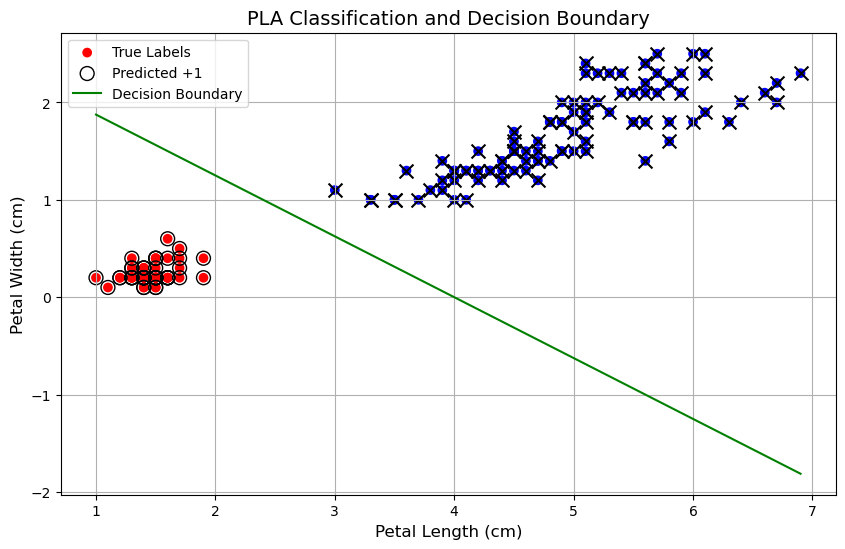

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
X = data['data'][:, [2, 3]]  # Petal length and Petal width
y = data['target']

# Combine Iris-versicolor and Iris-virginica into one class (-1), Iris-setosa as +1
y_binary = np.where(y == 0, 1, -1)

# Perceptron Learning Algorithm
def perceptron(X, y, epochs=1000, lr=0.01):
    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0

    for _ in range(epochs):
        for i in range(len(y)):
            # Check if the sample is misclassified
            if y[i] * (np.dot(X[i], weights) + bias) <= 0:
                weights += lr * y[i] * X[i]
                bias += lr * y[i]
    
    return weights, bias

# Train the Perceptron
weights, bias = perceptron(X, y_binary)

# Decision boundary function
def decision_boundary(x, weights, bias):
    return (-weights[0] * x - bias) / weights[1]

# Visualization
plt.figure(figsize=(10, 6))

# Scatter true labels with color coding
colors = ['red' if label == 1 else 'blue' for label in y_binary]
plt.scatter(X[:, 0], X[:, 1], c=colors, label="True Labels")

# Predicted labels with different marker symbols
predictions = np.sign(np.dot(X, weights) + bias)
for i in range(len(predictions)):
    if predictions[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], marker='o', edgecolor='black', facecolor='none', s=100, label="Predicted +1" if i == 0 else "")
    else:
        plt.scatter(X[i, 0], X[i, 1], marker='x', color='black', s=100, label="Predicted -1" if i == 0 else "")

# Plot decision boundary
x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
plt.plot(x_vals, decision_boundary(x_vals, weights, bias), color='green', label='Decision Boundary')

# Add labels and legend
plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.title('PLA Classification and Decision Boundary', fontsize=14)
plt.legend()
plt.grid()
plt.show()


(3) Add the decision line defined by the perceptron (or its weight vector $\mathbf{w}$) to your visualization. This line is the “final hypothesis” *g* given to you by PLA.
   * If you need a hint on how to formulate the final hypothesis as a straight line, look up the hint in Task 2.2.2 step (6).

(4) Create another scatter plot that shows the decision lines that are output for each step of the perceptron learning algorithm in addition to the feature pairs. This allows you to observe how your algorithm slowly converges to a result. If the display becomes too confusing, limit the number of decision lines for a few consecutive iteration steps.
   * For the Python professionals among you: You are welcome to color-code the decision lines so that the color becomes stronger with increasing iteration steps.




(5) Can you answer whether your model will give good classifications for iris species that I have not provided to you for training your perceptron?
   * If yes, justify this in a few sentences.
   * If no, justify this in a few sentences.

Are you finished with this subtask? Then congratulations: You have - in a very simple way - understood important steps in a machine learning project:

1. you have looked at data in the last exercise.
2. you have identified features and gained an intuition as to how data can be used to distinguish one species of iris from another. This step is a very simple version of what is called “feature engineering”, i.e. finding features that can be used to successfully train models. 
3. you have trained a simple model of a neuron (the perceptron) that allows you to distinguish one species of iris from the others.

If you are going to work in the field of *applied machine learning* in a company, it is quite likely that around 80% of your working time will be spent on step 1 and especially step 2, while you will spend the remaining 20% on step 3. If you work in research or research-related activities in the field of *machine learning*, this ratio is reversed: You will spend about 80% of your time on step 3 and the further or new development of learning models.




## 2.4 \[Optional\] PLA und synthetische Daten
In der Exercise letzter Woche haben einige von Ihnen bereits eine function implementiert, die einen synthetischen Datensatz generiert, der linear separierbar ist. Wir werden diese function nutzen, um PLA zu investigate. Wenn Sie Ihre eigene function nutzen möchten (sofern Sie sie geschrieben haben), kopieren Sie sie gerne in dieses Notebook. Wenn nicht, dann nutzen Sie die unten stehende Lösung.

* Die Ihnen hier zur Verfügung gestellte Lösung zur Generierung eines synthetischen Datensatzes ist recht allgemein: Sie würfelt zwei Zufallspunkte in der Ebene und legt durch diese zwei Punkte eine [Gerade](https://de.wikipedia.org/wiki/Geradengleichung#Haupt-_oder_Normalform). Die resultierenden Werte für die Geradensteigung $m$ und den Achsenabschnitt $b$ werden dann berechnet.

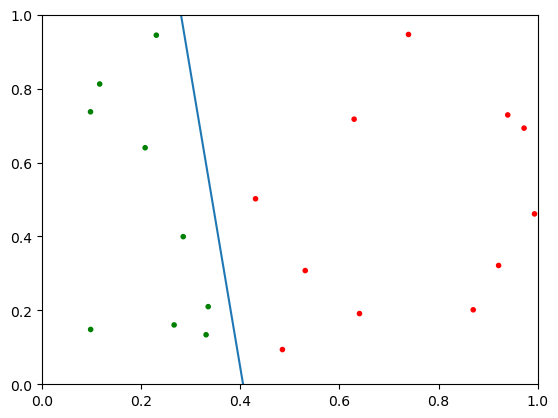

In [26]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def generate_points(N):
    return np.random.rand(N, 2)
    
def generate_decision_line():
    g = generate_points(2)
    m = (g[1, 1]-g[1, 0])/(g[0, 1]-g[0, 0])
    b = g[1, 0]-m*g[0, 0]
    def getY(x):
        return m*x+b
    func = getY
    return func


def getClassedPoints(N):
    f = generate_decision_line()  # target function
    X = generate_points(N)  # data set
    y = np.array([1 if f(X[i, 0]) > X[i, 1] else -1
                  for i in range(X.shape[0])])  # labels
    return X, y, f


# Obtain points X, labels y, and target function "target_function".
# Note that in real world problems, we do not know the target function.
X, y, target_function = getClassedPoints(20)

# create color labels according to target values
lookup = np.array(["r", "g"])
c = lookup[(y+1)//2]

# plot points
plt.axis((0, 1, 0, 1))
plt.scatter(X[:,0], X[:,1], c=c, marker='.')

# plot decision line
l = np.linspace(0, 1, 2)
plt.plot(l, target_function(l))

**Your Tasks:**

Wir wollen das Verhalten von PLA investigate, insbesondere, wie die Iterationsanzahl von der Number of data points abhängt.

(1) Erzeugen Sie einen synthetischen Datensatz mit 20 Punkten und wenden Sie PLA darauf an. Erfassen Sie dabei die number der Iterationen, die PLA benötigt hat. Visualize den Datensatz und die finale Hypothese (Gerade), die durch PLA generiert, sowie die tatsächliche Linie, über die die Daten generiert wurden. Kommentieren Sie die Ähnlichkeit oder Unähnlichkeit beider Geraden.

(2) Wiederholen Sie Punkt (1) mit einem neuen synthetischen Datensatz derselben Größe (also 20 Punkte). Wie viele Iterationen braucht PLA nun?

(3) Wiederholen Sie Punkt (2) mit demselben synthetischen Datensatz, doch permutieren Sie die Reihenfolge, in der die data points des Datensatzes im Array stehen, random. Wie viele Iterationen benötigt PLA nun?

(4) Erzeugen Sie 100 synthetische Datensätze der Größe 20 und ermitteln Sie für jeden Datensatz die Iterationsanzahl von PLA. Erzeugen Sie ein Histogramm, das die Häufigkeit der auftretenden Iterationsanzahl darstellt. 
   * Wie interpretieren Sie dieses Histogramm?

(5) Fassen Sie Ihre Beobachtungen kurz in wenigen Sätzen zusammen.

(6) Diejenigen unter Ihnen, die durch diese Exercise "gerauscht" sind und noch Zeit und Energie verspüren, können sich gerne followingr Frage widmen:

* Wie verhält sich die Iterationsanzahl von PLA in Abhängigkeit der Punktanzahl $N$ und der Raumdimension $d$, in der die Punkte leben?

Passen Sie dazu die function an, die den synthetischen Datensatz generiert, um Räume mit $d>2$ zuzulassen, und scannen Sie den Parameterraum für $N$ und $d$ (wählen Sie den Parameterraum nicht zu groß - etwa 3 Werte für $N$ und 3 Werte für $d$ sollten genügen). Führen Sie für jedes $(N, d)$ Paar ein Training durch und zeichnen die Iterationsanzahl auf. Wiederholen Sie den Vorgang und erzeugen damit ein kleines Ensemble (etwa 10-20 Ensemblemitglieder) für jedes $(N, d)$ Paar. Die entstehenden Histogramme eines $(N, d)$ Paares können Sie über Kenngrößen charakterisieren, beispielsweise über Mittelwerte oder Mediane. Visualize Ihre gewählte Kenngröße in Abhängigkeit von $N$ und $d$. Wie interpretieren Sie Ihre Beobachtungen?